In [39]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)


clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clincal_combined = pd.merge(mouse_data, clinical_data, how="left", on=["Mouse ID", "Mouse ID"])
mouse_clincal_combined.head()
# Display the data table for preview
#mouse_clincal_combined.loc[mouse_clincal_combined['Drug'] == "Capomulin"].groupby(['Timepoint'],as_index=False)["Tumor Volume (mm3)"].mean()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [40]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

groupby_data_mean = mouse_clincal_combined.groupby(['Drug','Timepoint'],as_index=False)["Tumor Volume (mm3)"].mean()


#print (mean)
#print (mean_data)

#print (mean_df)
#type(mean_df)
# Convert to DataFrame


# Preview DataFrame
groupby_data_mean.head(20)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [41]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

groupby_data_Std_err = mouse_clincal_combined.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].sem().reset_index()

groupby_data_Std_err.head()

# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [42]:
cap_err = groupby_data_Std_err.loc[groupby_data_Std_err['Drug']== "Capomulin"]['Tumor Volume (mm3)']
cap_tp = groupby_data_Std_err.loc[groupby_data_Std_err['Drug']== "Capomulin"]['Timepoint']
cap_mean = groupby_data_mean.loc[groupby_data_mean['Drug']=="Capomulin"]['Tumor Volume (mm3)']

In [43]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


pivoted_data = groupby_data_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivoted_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


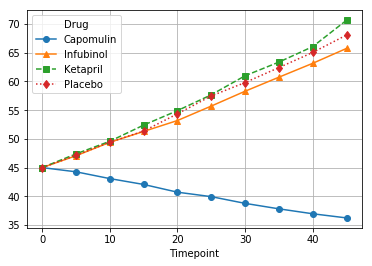

In [44]:
# Save the Figure
pivoted_data[['Capomulin','Infubinol','Ketapril','Placebo']].plot(style=['o-','^-','s--','d:'])


plt.grid(True)
plt.show()

## Metastatic Response to Treatment

In [46]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

groupby_data_metastatic_mean = mouse_clincal_combined.groupby(['Drug','Timepoint'],as_index=False)["Metastatic Sites"].mean()

groupby_data_metastatic_mean.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [47]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

groupby_data_metastatic_std_error = mouse_clincal_combined.groupby(['Drug','Timepoint'],as_index=True)["Metastatic Sites"].sem()

groupby_data_metastatic_std_error.head()

# Convert to DataFrame

# Preview DataFrame


Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: Metastatic Sites, dtype: float64

In [48]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_pivoted_data = groupby_data_metastatic_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_pivoted_data.head()

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


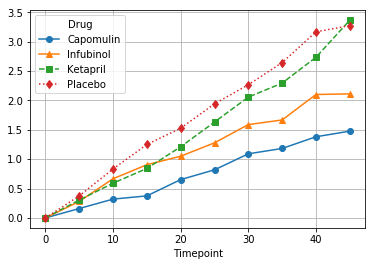

In [49]:
# Generate the Plot (with Error Bars)
metastatic_pivoted_data[['Capomulin','Infubinol','Ketapril','Placebo']].plot(style=['o-','^-','s--','d:'])
plt.grid(True)
plt.show()

# Save the Figure

# Show the Figure


## Survival Rates

In [50]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

groupby_data_idcount = mouse_clincal_combined.groupby(['Drug','Timepoint'],as_index=False)["Mouse ID"].count()
groupby_data_idcount.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [51]:
# Minor Data Munging to Re-Format the Data Frames

Mouse_ID_pivoted_data = groupby_data_idcount.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
Mouse_ID_pivoted_data.head(20)

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


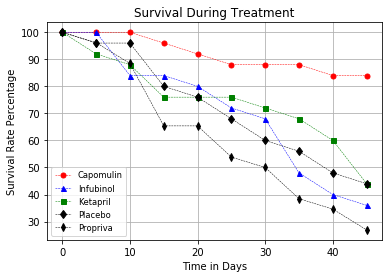

In [52]:
import matplotlib.pyplot as plt

# Generate the Plot (Accounting for percentages)
plt.plot(100 * Mouse_ID_pivoted_data["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * Mouse_ID_pivoted_data["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * Mouse_ID_pivoted_data["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * Mouse_ID_pivoted_data["Placebo"] / 25, "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.plot(100 * Mouse_ID_pivoted_data["Propriva"] /Mouse_ID_pivoted_data["Propriva"].max() , "kd", linestyle="dashed", markersize=5, linewidth=0.50)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate Percentage")
plt.xlabel("Time in Days")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

#Mouse_ID_pivoted_data[['Capomulin','Infubinol','Ketapril','Placebo']].plot(style=['o-','^-','s--','d:'])
#plt.grid(True)
#plt.show()

# Save the Figure
#plt.savefig("analysis/Fig3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [81]:
###This is most important in this dataset
###This summarizes the efficacy of drugs and which drug works and which does not
###And remember we always compare our data against Placebo as 'Test' data

# Calculate the percent changes for each drug
tumor_pct_change = 100 * (pivoted_data.iloc[-1] - pivoted_data.iloc[0])/ pivoted_data.iloc[0]
#tumor_pct_change_sem = 100 * (groupby_data_metastatic_sem.iloc[-1] - groupby_data_metastatic_sem.iloc[0])/ groupby_data_metastatic_sem.iloc[0]


# Display the data to confirm
print(tumor_pct_change)
#pivoted_data.iloc[-1] - pivoted_data.iloc[0] / pivoted_data[0]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


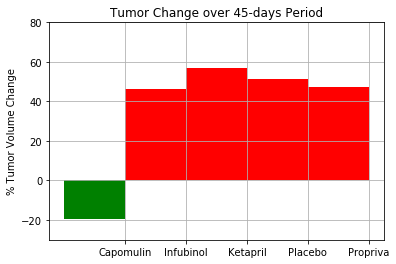

In [79]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"],
                tumor_pct_change["Infubinol"],
                 tumor_pct_change["Ketapril"],
                 tumor_pct_change["Placebo"],
                tumor_pct_change["Propriva"])    


# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')
# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change over 45-days Period")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo', 'Propriva'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 80])
ax.set_ylabel("% Tumor Volume Change")
ax.grid(True)


####Skipping the functions set up and call tasks
# Use functions to label the percentages of changes
# Call functions to implement the function calls
#####Same thing for image since the image runs into issues
# Save the Figure
#plt.savefig("analysis/Fig4.png")


# Show the Figure
fig.show()